In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import glob
from utils import *

In [3]:
needle_d = np.zeros((2))
needle_std = np.zeros((2))
folder2 = 'drops/img/'
features = ['noz_0_','white_0_']
all_names = [folder2+feat for feat in features]
M = []

# Load calculated parameters for transformation
poly_file = 'data/polynomials_2022.txt'
p = magnification(poly_file)

## Nozzle z=0

In [4]:
#Correct names and folders
folder1 = 'drops/res_noz_0/'
# Correct name for target files
name_feat = folder2 + 'noz_0_'

#Obtain maximum intensity for one series
M.append(obtain_intensity_maxima(all_names[0],(100,150)))
max_gray=M[-1]

# Load PTV data
name = folder1+'rt_is.10???'
filenames=sorted(glob.glob(name))
N = len(filenames)
print(N)

250


In [5]:
d_E = []
gray_sum = []

for j in range(100,151):
    name = filenames[j]
    a = np.loadtxt(name, skiprows=1)
    
    #Separate data into coordinates, add offset  between ptv and real positions(systematic error) 
    x = a[:,1]/10.
    y = a[:,2]/10.
    z = a[:,3]/10.
    
    for i in range(len(a)):
        if -3<z[i] and z[i]<-2 and -3<y[i] and y[i]<15:
            #Scale pixel to world with z position
            scale = [p[j](a[i][3])*0.1 for j in range(4)]
            #Find ID in each camera
            ID = np.array([int(a[i][4]),int(a[i][5]),int(a[i][6]),int(a[i][7])],dtype=int)
            #Use ID values to obtain axis lengths and intensity
            al, b, gray = obtain_values_from_ID(ID,scale,name_feat,count=j)
            gray_sum.append(gray)
            d_E.append(np.sqrt(al*b)/resize(gray_sum[i]/max_gray,np.sqrt(al*b)))


In [6]:
needle_d[0] = np.asarray(d_E).mean()
needle_std[0] = np.asarray(d_E).std()
print(np.asarray(d_E).mean(), np.asarray(d_E).std())

5.262486993160219 0.21518197641205358


## white z=0

In [7]:
folder1 = 'multi_drops/res_white_0/'
folder2 = 'multi_drops/img/'
# Correct name for target files
name_feat = folder2 + 'white_0_'

#Obtain maximum intensity for one series
M.append(obtain_intensity_maxima(all_names[1],(100,150)))
max_gray=M[-1]

# Load PTV data
name = folder1+'rt_is.10???'
filenames=sorted(glob.glob(name))
N = len(filenames)
print(N)

250


In [8]:
d_E = []
gray_sum = []

for j in range(100,150):
    name = filenames[j]
    a = np.loadtxt(name, skiprows=1)
    
    #Separate data into coordinates, add offset  between ptv and real positions(systematic error) 
    x = a[:,1]/10.
    y = a[:,2]/10.
    z = a[:,3]/10.
    
    for i in range(len(a)):
        if -4<z[i] and z[i]<-1:
            #Scale pixel to world with z position
            scale = [p[j](a[i][3])*0.1 for j in range(4)]
            #Find ID in each camera
            ID = np.array([int(a[i][4]),int(a[i][5]),int(a[i][6]),int(a[i][7])],dtype=int)
            #Use ID values to obtain axis lengths and intensity
            al, b, gray = obtain_values_from_ID(ID,scale,name_feat,count=j)
            gray_sum.append(gray)
            d_E.append(np.sqrt(al*b)/resize(gray_sum[i]/max_gray,np.sqrt(al*b)))


In [9]:
needle_d[1] = np.asarray(d_E).mean()
needle_std[1] = np.asarray(d_E).std()
print(np.asarray(d_E).mean(), np.asarray(d_E).std())

2.515277679075556 0.12234556415519979


## Measured data

In [10]:
D_needle = np.array([5.073,2.429])
std_needle = np.array([0.067,0.081])

Text(0, 0.5, 'Estimated diameter [mm]')

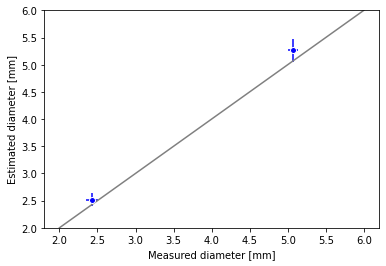

In [12]:
plt.errorbar(D_needle,needle_d,yerr=needle_std,xerr=std_needle,ecolor='b',c='w',marker='o',markerfacecolor='b')

### Identity line ###
x = np.linspace(2,6,20)
plt.plot(x,x,c='gray')
#####################

plt.ylim(2,6)
plt.xlabel('Measured diameter [mm]')
plt.ylabel('Estimated diameter [mm]')
#plt.savefig('drop-estimation-size.png',dpi=300,bbox_inches='tight')